![](./img/deeper.gif)

In [1]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten
import matplotlib.pyplot as plt
import numpy as np

## LeNet 1998

##### original paper: http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

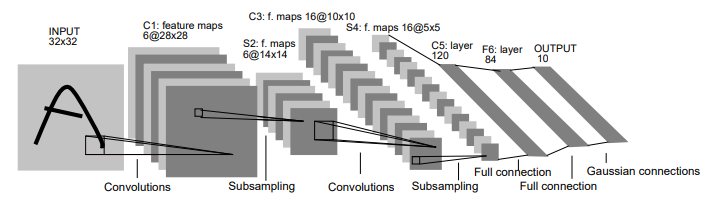

#### Keras Implementation 

In [2]:
lenet = keras.Sequential()

lenet.add(Conv2D(filters = 6, kernel_size = (5,5), strides = (1,1),activation="relu",input_shape=(32,32,3)))
lenet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

lenet.add(Conv2D(filters = 16, kernel_size = (5,5),strides = (1,1),activation="relu"))
lenet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

lenet.add(Flatten())

lenet.add(Dense(units=120,activation="relu"))
lenet.add(Dense(units=84,activation="relu"))
lenet.add(Dense(units=10,activation="softmax"))


W0716 21:00:08.027326 139855535781696 deprecation.py:506] From /root/environments/my_env/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [3]:
lenet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

## AlexNet  (2012)
###### modified LeNet
###### original paper:https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf

Main Points

Trained the network on ImageNet data, which contained over 15 million annotated images from a total of over 22,000 categories.
Used ReLU for the nonlinearity functions (Found to decrease training time as ReLUs are several times faster than the conventional tanh function).
Used data augmentation techniques that consisted of image translations, horizontal reflections, and patch extractions.
Implemented dropout layers in order to combat the problem of overfitting to the training data.
Trained the model using batch stochastic gradient descent, with specific values for momentum and weight decay.
Trained on two GTX 580 GPUs for five to six days.

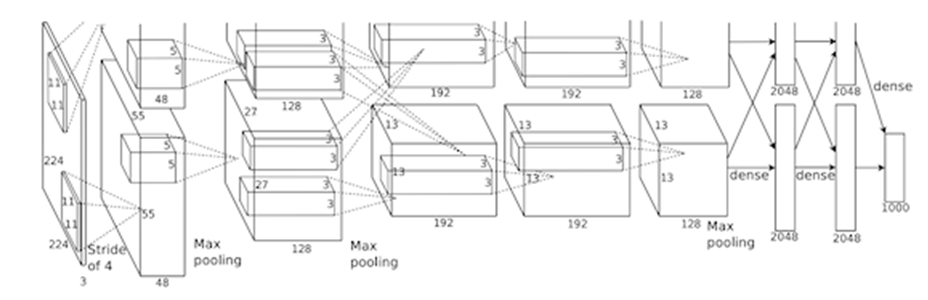

In [5]:
keras.backend.clear_session()


## VGG Net (2014)

###### original paper:https://arxiv.org/pdf/1409.1556.pdf

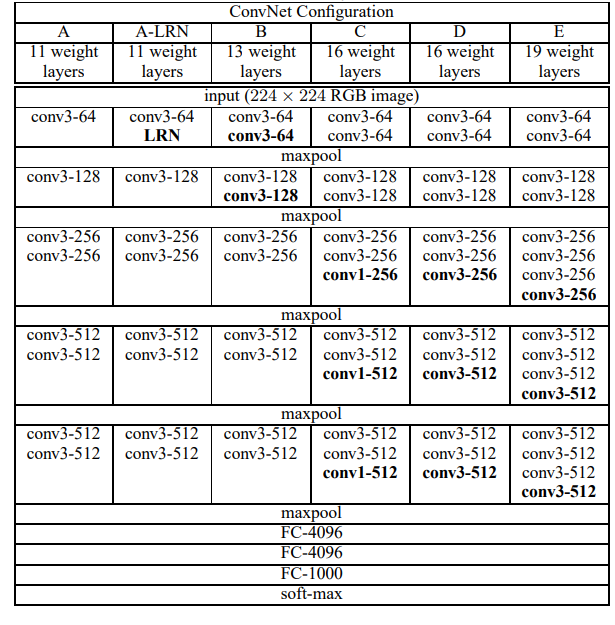

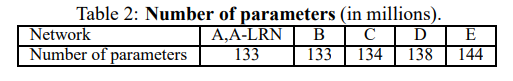

![](./img/vgg.png)

Main Points

The use of only 3x3 sized filters is quite different from AlexNet’s 11x11 filters in the first layer and ZF Net’s 7x7 filters. The authors’ reasoning is that the combination of two 3x3 conv layers has an effective receptive field of 5x5. This in turn simulates a larger filter while keeping the benefits of smaller filter sizes. One of the benefits is a decrease in the number of parameters. Also, with two conv layers, we’re able to use two ReLU layers instead of one.
3 conv layers back to back have an effective receptive field of 7x7.
As the spatial size of the input volumes at each layer decrease (result of the conv and pool layers), the depth of the volumes increase due to the increased number of filters as you go down the network.
Interesting to notice that the number of filters doubles after each maxpool layer. This reinforces the idea of shrinking spatial dimensions, but growing depth.
Worked well on both image classification and localization tasks. The authors used a form of localization as regression (see page 10 of the paper for all details).
Built model with the Caffe toolbox.
Used scale jittering as one data augmentation technique during training.
Used ReLU layers after each conv layer and trained with batch gradient descent.
Trained on 4 Nvidia Titan Black GPUs for two to three weeks.

## GoogLeNet (2015)

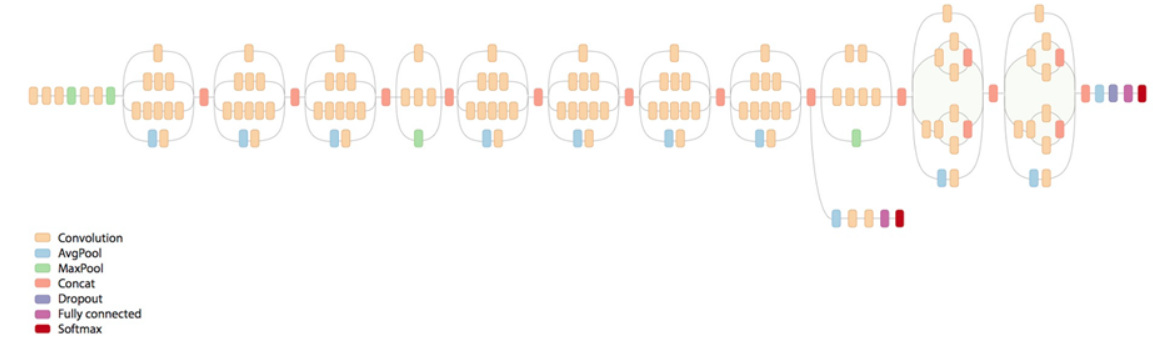